### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 4</span>

## <span style="color:blue"> Exercise 4.1</span>
#### Scope
The scope of this first exercise was to add to the code downloaded from the LSN Ariel site of Molecoular Dynamics, the possibility to continue the simulation from when the point in which the previous one ended, and also add an option to rescale velocities in order to match up a desired temperature. 

#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio4.1 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./MolDyn_NVE.exe` </font>. You can decide to continue the simulation from the point the previous one ended setting 1 in the second to last value in the file <font face = "Courier"> input.dat </font> and you can rescale velocities setting 1 in the last value in the same file.

#### Equilibration
This possibility is extremely helpful in the equilibration phase. In fact when we start a simulation we randomly generate velocities from a uniform distribution, not a Maxwell one, because it's easier. Then we rescale them to match the desired temperature. After some steps, collisions distribute energy among particles and velocities tend to assume a Maxwell distribution. This fact leads the temperature to take a lower value than the starting one. In order to correct this we have two possibilities: the first one is to start our simulation from a higher temperature, so when it drops it will reach the correct value (for example if we want a temperature of 1.1 in natural units we should start from 1.9), another possibility is to rescale velocities every 100 measurement for example. We followed the second option.

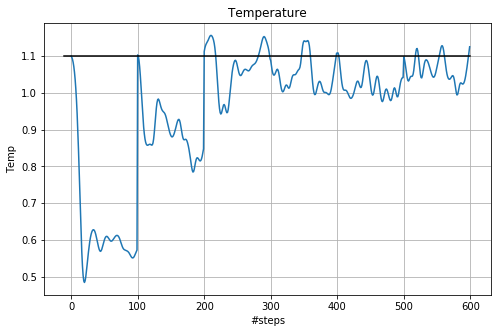

In [134]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 5]
y = np.loadtxt("Esercizio4.1/results_equil/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(y)
plt.xlabel('#steps')
plt.ylabel('Temp')
plt.title('Temperature')
plt.grid(True)
plt.plot([-10, 600], [1.1, 1.1], color='k', linestyle='-', linewidth=1.5)
plt.show()

We can see that when we start the first simulation temperature drops from 1.1 to 0.5 almost immediately due to equipartition of energy. When we restart (#step = 100) we force it to came back to 1.1 and so we do every 100 steps. After 3/4 repetitions temperature stabilizes around 1.1 as we wanted. So the system is equilibrated.

We can see the importance of the equilibration phase not only in the value of temperature but also looking at the istant values of kinetic, potential and total energy of the system.

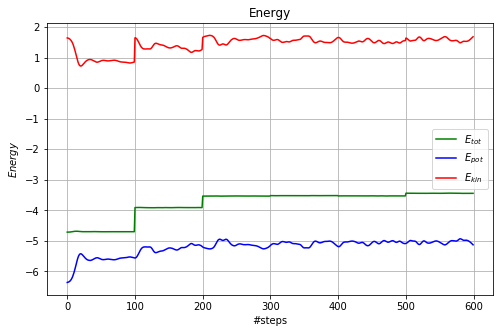

In [135]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 5]
Etot = np.loadtxt("Esercizio4.1/results_equil/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
Epot = np.loadtxt("Esercizio4.1/results_equil/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
Ekin = np.loadtxt("Esercizio4.1/results_equil/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(Etot, 'green')
plt.plot(Epot, 'blue')
plt.plot(Ekin, 'red')
plt.xlabel('#steps')
plt.ylabel('$Energy$')
plt.title('Energy')
plt.legend( ['$E_{tot}$', '$E_{pot}$', '$E_{kin}$'])
plt.grid(True)
plt.show()

## <span style="color:blue"> Exercise 4.2</span>
#### Scope
In the second part of the exercise we were supposed to implement block average to calculate average values for temperature, potential energy, kinetic energy and total energy.

#### Block average
The block average method is useful to calculate average values from a data set in which measurements are correlated. If they are correlated, the hypothesis of central limit theroem are not satisfied, so we can't calculate the error of the mean value as $\sigma_{M} = \frac{\sigma}{\sqrt{N}} $ where $\sigma_M$ is the error of the mean value and $\sigma$ the RMS. To solve this problem we have two possibilities: the first one is to calculate the properties of the system every $n$ steps, so the value we obtain are scorrelated and we can use the Central Limit Theorem, or we can use block average. So we calculate mean of $m$ values, the mean values we obtain from each block are scorrelated one from the other so we can use the CLT.

In this particoular case we use a mix of the two techiques. In fact we measured the properties of the system every 10 steps, and we divided the 10 000 steps in 50 blocks. So we made 1 000 measurement divided in 50 blocks, so every blocks contains 20 values. In this way we can be quite confident that the values we obtained satisfy the hypothesis of the CLT. We reported below istant values as a function of #steps and the mean value as a function of #blocks for temperature, potential energy, kinetic energy and total energy.

#### Temperature

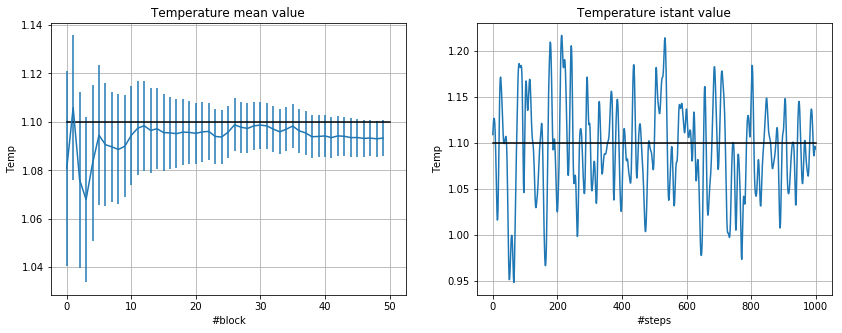

In [122]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("Esercizio4.1/results_1/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio4.1/results_1/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2)
ax[0].errorbar(x1, y1 ,yerr1)
ax[0].set_xlabel('#block')
ax[0].set_ylabel('Temp')
ax[0].set_title('Temperature mean value')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('Temp')
ax[1].set_title('Temperature istant value')
ax[0].grid(True)
ax[1].grid(True)
ax[0].plot([0, 50], [1.1, 1.1], color='k', linestyle='-', linewidth=1.5)
ax[1].plot([0, 1000], [1.1, 1.1], color='k', linestyle='-', linewidth=1.5)
plt.show()

The mean value of the temperature is compatible with 1.1 which is the value we set.

#### Potential Energy

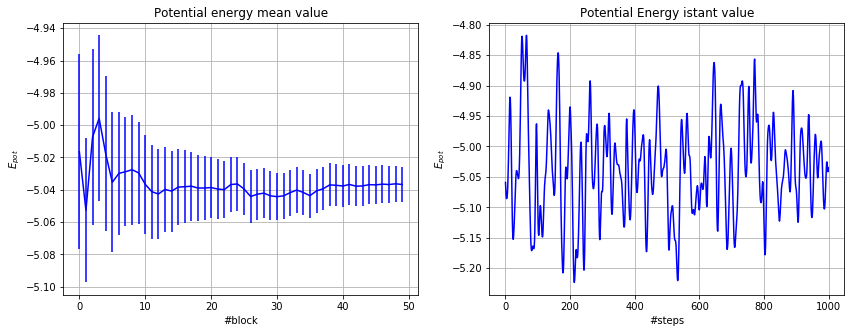

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("Esercizio4.1/results_1/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio4.1/results_1/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='blue')
ax[0].errorbar(x1, y1 ,yerr1, color= 'blue')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{pot}$')
ax[0].set_title('Potential energy mean value')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{pot}$')
ax[1].set_title('Potential Energy istant value')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

#### Kinetic Energy

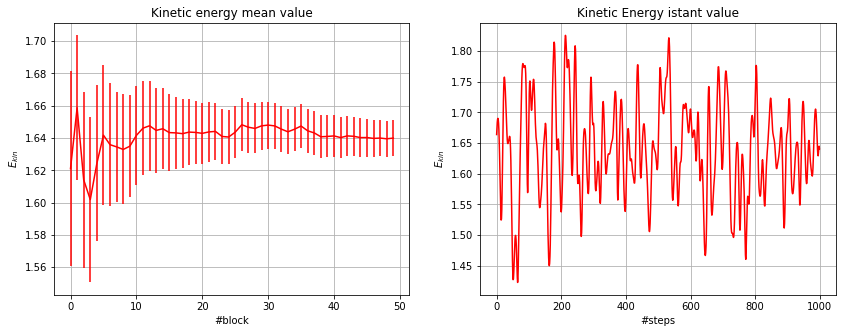

In [124]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("Esercizio4.1/results_1/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio4.1/results_1/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='red')
ax[0].errorbar(x1, y1 ,yerr1, color= 'red')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{kin}$')
ax[0].set_title('Kinetic energy mean value')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{kin}$')
ax[1].set_title('Kinetic Energy istant value')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

#### Total Energy

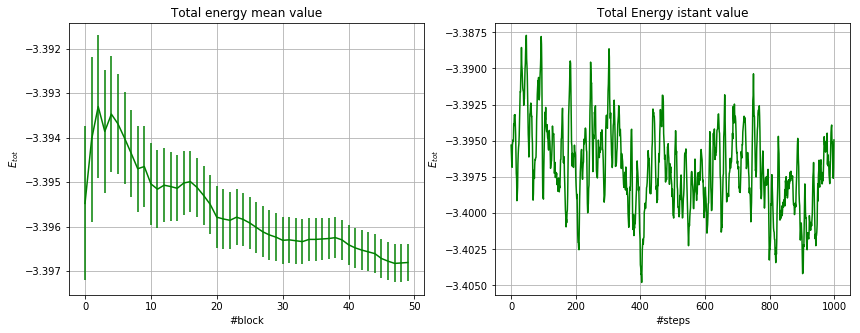

In [125]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("Esercizio4.1/results_1/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio4.1/results_1/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='green')
ax[0].errorbar(x1, y1 ,yerr1, color= 'green')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{tot}$')
ax[0].set_title('Total energy mean value')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{tot}$')
ax[1].set_title('Total Energy istant value')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

We can see that the total energy has oscillation 2 order smaller than potencial e kinetic ones, as we expected, since the energy must conservate.

## <span style="color:blue"> Exercise 4.3</span>
#### Scope
In the third part of the exercise we had to add pressure to observable. 

#### Pressure
Via the virial theorem, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

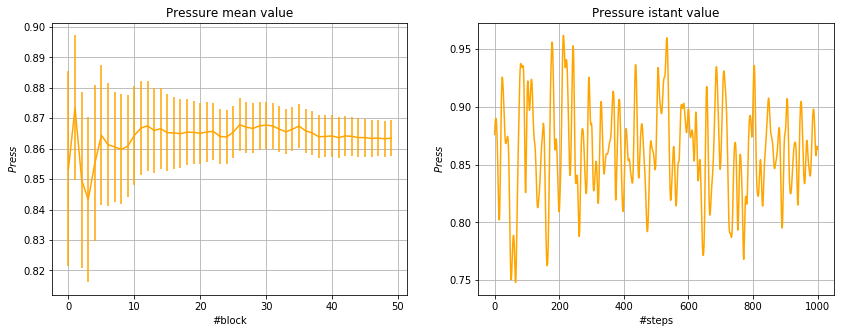

In [141]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("Esercizio4.1/results_1/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio4.1/results_1/output_press.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='orange')
ax[0].errorbar(x1, y1 ,yerr1, color= 'orange')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$Press$')
ax[0].set_title('Pressure mean value')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$Press$')
ax[1].set_title('Pressure istant value')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

## <span style="color:blue"> Exercise 4.4</span>
#### Scope
In the last part of the exercise we had to use our upgraded MD code, to equilibrate and perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the pressure $P$ and the temperature, $T$ in SI units!

To reobtain units in SI from reduced ones we do

$$ T = \frac{\epsilon T^* }{k_B}, \qquad p = \frac{\epsilon p^*}{\sigma^3}, \qquad E_{pot}= \epsilon E_{pot}^* , \qquad E_{tot}= \epsilon E_{tot}^* , \qquad E_{kin}= \epsilon E_{kin}^* $$

where with $^*$ we indicate reduced units. We made this calculation directly here with python so we don't have to modify our code.

#### Solid phase
For the simulation we use:
-$\rho^*=1.1$, $T^*=0.8$ and $r_C=2.2$

The parametres to come back ti SI units for Argon are:
- $\sigma = 0.34$ nm, 
- $\epsilon/k_B = 120$ K,
- $m=39.948$ amu

For Krypton are:
- $\sigma = 0.364$ nm, 
- $\epsilon/k_B = 164$ K,
- $m=83.978$ amu

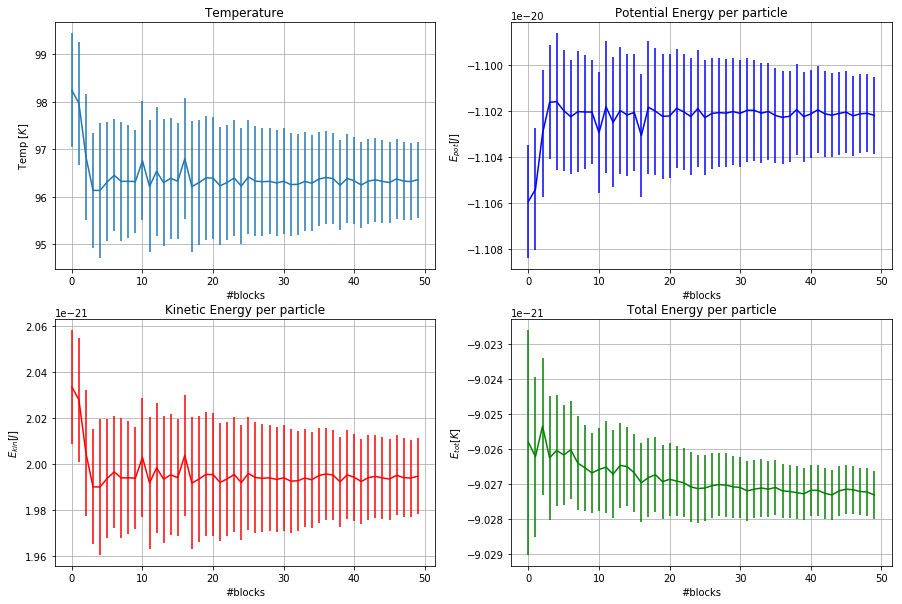

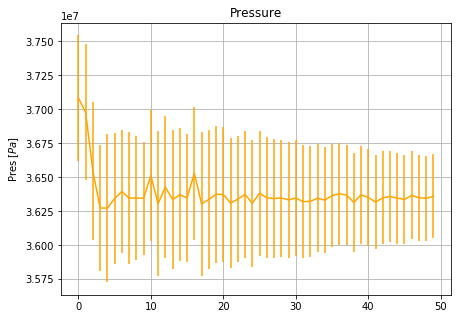

=============== ARGON ===============

Temperature =  96.357 ± 0.8017884000000001  K
Potential Energy =  -1.102190544e-20 ± 1.6750440000000002e-23  J
Kinetic Energy =  1.9945857600000002e-21 ± 1.6597094400000003e-23  J
Total Energy =  -9.02731968e-21 ± 6.78037608e-25  J
Pressure =  36360795.033584364 ± 308369.7496438021  Pa


=============== KRYPTON ===============

Temperature =  96.357 ± 0.8017884000000001  K
Potential Energy =  -1.5063270767999998e-20 ± 2.2892268e-23  J
Kinetic Energy =  2.725933872e-21 ± 2.2682695680000004e-23  J
Total Energy =  -1.2337336895999999e-20 ± 9.266513975999998e-25  J
Pressure =  40497533.44409485 ± 343452.7280773809  Pa


In [180]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

xp,yp,yerrp = np.loadtxt("Esercizio4.1/results_solid/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xep,yep,yerrep = np.loadtxt("Esercizio4.1/results_solid/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xet,yet,yerret = np.loadtxt("Esercizio4.1/results_solid/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xek,yek,yerrek = np.loadtxt("Esercizio4.1/results_solid/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xt,yt,yerrt = np.loadtxt("Esercizio4.1/results_solid/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
eps_kb_kr = 164.0
sigma_kr = 0.364E-9
eps_kr = eps_kb_kr * kb
#temperature
yt *= eps_kb_arg
yerrt *= eps_kb_arg

#pot en
yep *= eps_arg
yerrep *= eps_arg

#kin en
yek *= eps_arg
yerrek *= eps_arg

#tot en
yet *= eps_arg
yerret *= eps_arg

#pressure
yp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)
yerrp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)

ax[0][0].errorbar(xt, yt ,yerrt)
ax[0][1].errorbar(xep, yep ,yerrep, color = 'blue')
ax[1][0].errorbar(xek, yek ,yerrek, color = 'red')
ax[1][1].errorbar(xet, yet ,yerret, color ='green')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('#blocks')
        ax[i][j].grid(True) 

ax[0][0].set_title('Temperature')
ax[0][1].set_title('Potential Energy per particle')
ax[1][0].set_title('Kinetic Energy per particle')
ax[1][1].set_title('Total Energy per particle')


ax[0][0].set_ylabel('Temp $[K]$')
ax[0][1].set_ylabel('$E_{pot} [J]$')
ax[1][0].set_ylabel('$E_{kin} [J]$')
ax[1][1].set_ylabel('$E_{tot} [K]$')

plt.show()

plt.rcParams['figure.figsize'] = [7, 5]
plt.errorbar(xp, yp ,yerrp, color='orange')
plt.title('Pressure')
plt.ylabel('Pres $[Pa]$')
plt.grid(True)
plt.show()

print('=============== ARGON ===============\n')
print('Temperature = ', yt[49],'±',yerrt[49],' K')
print('Potential Energy = ', yep[49],'±',yerrep[49],' J')
print('Kinetic Energy = ', yek[49],'±',yerrek[49],' J')
print('Total Energy = ', yet[49],'±',yerret[49],' J')
print('Pressure = ', yp[49],'±',yerrp[49],' Pa')

print('\n\n=============== KRYPTON ===============\n')
print('Temperature = ', (yt[49]*eps_kb_kr)/eps_kb_kr,'±',(yerrt[49]*eps_kb_kr)/eps_kb_kr,' K')
print('Potential Energy = ', (yep[49]*eps_kr)/eps_arg,'±',(yerrep[49]*eps_kr)/eps_arg,' J')
print('Kinetic Energy = ', (yek[49]*eps_kr)/eps_arg,'±',(yerrek[49]*eps_kr)/eps_arg,' J')
print('Total Energy = ', (yet[49]*eps_kr)/eps_arg,'±',(yerret[49]*eps_kr)/eps_arg,' J')
print('Pressure = ', (yp[49]*(sigma_arg**3)*eps_kr)/(eps_arg*(sigma_kr**3)),'±',(yerrp[49]*(sigma_arg**3)*eps_kr)/(eps_arg*(sigma_kr**3)),' Pa')

We drew graphs only for Argon, because they are the same for Krypton except for the value they converge to. The correct values for $T, E_{pot}/N, E_{kin}/N, E_{tot}/N, p$ are reported above (with error) for both Krypton and Argon  
#### Liquid phase

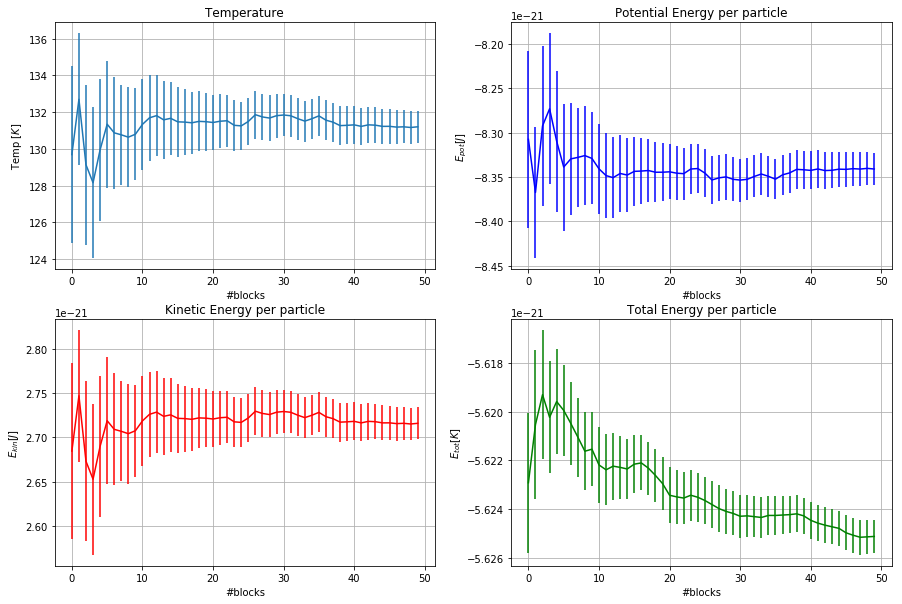

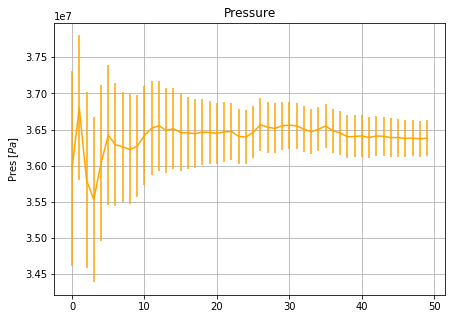

=============== ARGON ===============

Temperature =  131.1972 ± 0.8749068000000001  K
Potential Energy =  -8.34089112e-21 ± 1.81573776e-23  J
Kinetic Energy =  2.7157737600000003e-21 ± 1.81105128e-23  J
Total Energy =  -5.62511736e-21 ± 6.8444964e-25  J
Pressure =  36381482.393649496 ± 244727.67759006712  Pa


=============== KRYPTON ===============

Temperature =  131.1972 ± 0.8749068000000001  K
Potential Energy =  -1.1399217863999999e-20 ± 2.4815082719999998e-23  J
Kinetic Energy =  3.711557472e-21 ± 2.475103416e-23  J
Total Energy =  -7.687660392e-21 ± 9.35414508e-25  J
Pressure =  40520574.388478324 ± 272570.1486654874  Pa


In [178]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

xp,yp,yerrp = np.loadtxt("Esercizio4.1/results_liquid/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xep,yep,yerrep = np.loadtxt("Esercizio4.1/results_liquid/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xet,yet,yerret = np.loadtxt("Esercizio4.1/results_liquid/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xek,yek,yerrek = np.loadtxt("Esercizio4.1/results_liquid/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xt,yt,yerrt = np.loadtxt("Esercizio4.1/results_liquid/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
eps_kb_kr = 164.0
sigma_kr = 0.364E-9
eps_kr = eps_kb_kr * kb
#temperature
yt *= eps_kb_arg
yerrt *= eps_kb_arg

#pot en
yep *= eps_arg
yerrep *= eps_arg

#kin en
yek *= eps_arg
yerrek *= eps_arg

#tot en
yet *= eps_arg
yerret *= eps_arg

#pressure
yp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)
yerrp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)

ax[0][0].errorbar(xt, yt ,yerrt)
ax[0][1].errorbar(xep, yep ,yerrep, color = 'blue')
ax[1][0].errorbar(xek, yek ,yerrek, color = 'red')
ax[1][1].errorbar(xet, yet ,yerret, color ='green')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('#blocks')
        ax[i][j].grid(True) 

ax[0][0].set_title('Temperature')
ax[0][1].set_title('Potential Energy per particle')
ax[1][0].set_title('Kinetic Energy per particle')
ax[1][1].set_title('Total Energy per particle')


ax[0][0].set_ylabel('Temp $[K]$')
ax[0][1].set_ylabel('$E_{pot} [J]$')
ax[1][0].set_ylabel('$E_{kin} [J]$')
ax[1][1].set_ylabel('$E_{tot} [K]$')

plt.show()

plt.rcParams['figure.figsize'] = [7, 5]
plt.errorbar(xp, yp ,yerrp, color='orange')
plt.title('Pressure')
plt.ylabel('Pres $[Pa]$')
plt.grid(True)
plt.show()

print('=============== ARGON ===============\n')
print('Temperature = ', yt[49],'±',yerrt[49],' K')
print('Potential Energy = ', yep[49],'±',yerrep[49],' J')
print('Kinetic Energy = ', yek[49],'±',yerrek[49],' J')
print('Total Energy = ', yet[49],'±',yerret[49],' J')
print('Pressure = ', yp[49],'±',yerrp[49],' Pa')

print('\n\n=============== KRYPTON ===============\n')
print('Temperature = ', (yt[49]*eps_kb_kr)/eps_kb_kr,'±',(yerrt[49]*eps_kb_kr)/eps_kb_kr,' K')
print('Potential Energy = ', (yep[49]*eps_kr)/eps_arg,'±',(yerrep[49]*eps_kr)/eps_arg,' J')
print('Kinetic Energy = ', (yek[49]*eps_kr)/eps_arg,'±',(yerrek[49]*eps_kr)/eps_arg,' J')
print('Total Energy = ', (yet[49]*eps_kr)/eps_arg,'±',(yerret[49]*eps_kr)/eps_arg,' J')
print('Pressure = ', (yp[49]*(sigma_arg**3)*eps_kr)/(eps_arg*(sigma_kr**3)),'±',(yerrp[49]*(sigma_arg**3)*eps_kr)/(eps_arg*(sigma_kr**3)),' Pa')

#### Gas phase

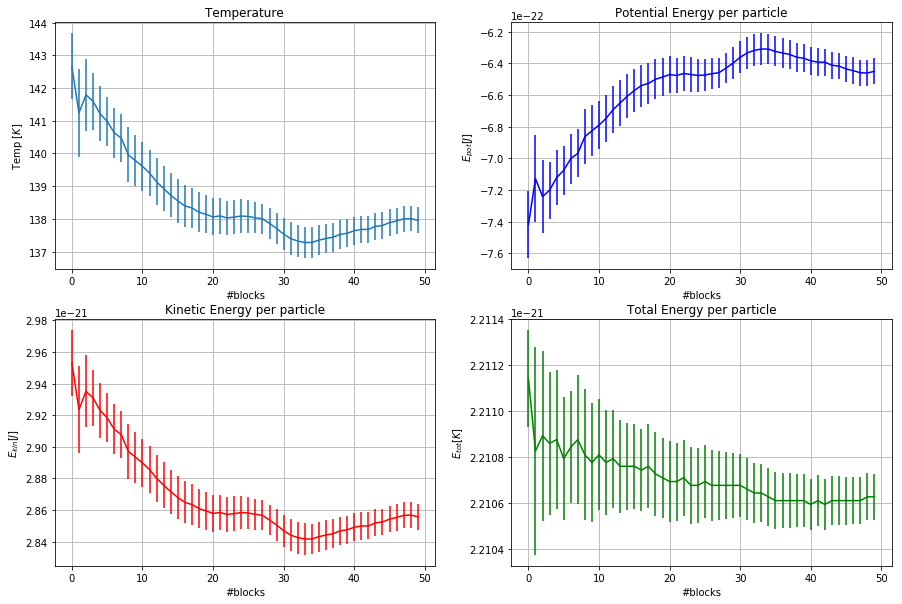

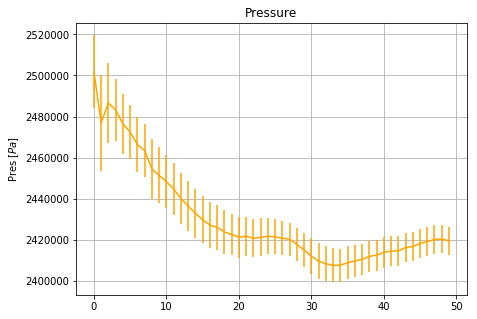

=============== ARGON ===============

Temperature =  137.9568 ± 0.3912168  K
Potential Energy =  -6.45083208e-22 ± 8.0894772e-24  J
Kinetic Energy =  2.8557057600000004e-21 ± 8.09818776e-24  J
Total Energy =  2.2106275200000004e-21 ± 9.98640864e-26  J
Pressure =  2419629.0250356193 ± 6839.510889476896  Pa


=============== KRYPTON ===============

Temperature =  137.9568 ± 0.3912168  K
Potential Energy =  -8.816137176e-22 ± 1.105561884e-23  J
Kinetic Energy =  3.902797872e-21 ± 1.1067523272e-23  J
Total Energy =  3.0211909440000004e-21 ± 1.3648091808e-25  J
Pressure =  2694908.273407549 ± 7617.636543205618  Pa


In [183]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

xp,yp,yerrp = np.loadtxt("Esercizio4.1/results_gas/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xep,yep,yerrep = np.loadtxt("Esercizio4.1/results_gas/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xet,yet,yerret = np.loadtxt("Esercizio4.1/results_gas/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xek,yek,yerrek = np.loadtxt("Esercizio4.1/results_gas/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xt,yt,yerrt = np.loadtxt("Esercizio4.1/results_gas/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
eps_kb_kr = 164.0
sigma_kr = 0.364E-9
eps_kr = eps_kb_kr * kb
#temperature
yt *= eps_kb_arg
yerrt *= eps_kb_arg

#pot en
yep *= eps_arg
yerrep *= eps_arg

#kin en
yek *= eps_arg
yerrek *= eps_arg

#tot en
yet *= eps_arg
yerret *= eps_arg

#pressure
yp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)
yerrp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)

ax[0][0].errorbar(xt, yt ,yerrt)
ax[0][1].errorbar(xep, yep ,yerrep, color = 'blue')
ax[1][0].errorbar(xek, yek ,yerrek, color = 'red')
ax[1][1].errorbar(xet, yet ,yerret, color ='green')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('#blocks')
        ax[i][j].grid(True) 

ax[0][0].set_title('Temperature')
ax[0][1].set_title('Potential Energy per particle')
ax[1][0].set_title('Kinetic Energy per particle')
ax[1][1].set_title('Total Energy per particle')


ax[0][0].set_ylabel('Temp $[K]$')
ax[0][1].set_ylabel('$E_{pot} [J]$')
ax[1][0].set_ylabel('$E_{kin} [J]$')
ax[1][1].set_ylabel('$E_{tot} [K]$')

plt.show()

plt.rcParams['figure.figsize'] = [7, 5]
plt.errorbar(xp, yp ,yerrp, color='orange')
plt.title('Pressure')
plt.ylabel('Pres $[Pa]$')
plt.grid(True)
plt.show()

print('=============== ARGON ===============\n')
print('Temperature = ', yt[49],'±',yerrt[49],' K')
print('Potential Energy = ', yep[49],'±',yerrep[49],' J')
print('Kinetic Energy = ', yek[49],'±',yerrek[49],' J')
print('Total Energy = ', yet[49],'±',yerret[49],' J')
print('Pressure = ', yp[49],'±',yerrp[49],' Pa')

print('\n\n=============== KRYPTON ===============\n')
print('Temperature = ', (yt[49]*eps_kb_kr)/eps_kb_kr,'±',(yerrt[49]*eps_kb_kr)/eps_kb_kr,' K')
print('Potential Energy = ', (yep[49]*eps_kr)/eps_arg,'±',(yerrep[49]*eps_kr)/eps_arg,' J')
print('Kinetic Energy = ', (yek[49]*eps_kr)/eps_arg,'±',(yerrek[49]*eps_kr)/eps_arg,' J')
print('Total Energy = ', (yet[49]*eps_kr)/eps_arg,'±',(yerret[49]*eps_kr)/eps_arg,' J')
print('Pressure = ', (yp[49]*(sigma_arg**3)*eps_kr)/(eps_arg*(sigma_kr**3)),'±',(yerrp[49]*(sigma_arg**3)*eps_kr)/(eps_arg*(sigma_kr**3)),' Pa')

The fact that in the solid phase the variables we are considering show smaller oscillations rather than the gas one, is due to the fact that the gas phase is more cahotic than the solid one.